In [1]:
import pandas as pd

In [2]:
old = pd.read_csv('https://raw.githubusercontent.com/publicsafetylab/public-psl-jdi-pops/master/data.csv')
print(old.shape, old.columns)
old.head()

(325675, 4) Index(['Population', 'Scrape_Date', 'STATE-COUNTY', 'State'], dtype='object')


,Population,Scrape_Date,STATE-COUNTY,State
0,182,2020-01-01,AL-Autauga,AL
1,184,2020-01-02,AL-Autauga,AL
2,178,2020-01-03,AL-Autauga,AL
3,180,2020-01-04,AL-Autauga,AL
4,184,2020-01-05,AL-Autauga,AL


In [5]:
pwd

'/Users/matthewmitchell/Documents/PPI/PPI_COVID_Data_Rollups'

In [6]:
ls

COVID_Prison_Transformations.ipynb
COVID_Prison_Transformations.py
Jail_Summaries_as_of_01-21-2021.xlsx
Jail_Summaries_as_of_12-07-2020.xlsx
Jail_Summaries_as_of_12-09-2020.xlsx
June18_Updated_File_Check.ipynb
Matthew-Mitchell-Resume.csv
PrisonWeeklyPopulations_as_of_12-03-2020.csv
README.md
Total_Jail_Population_By_Date_as_of_12-03-2020.csv
Total_Jail_Population_By_Date_as_of_12-07-2020.csv
Untitled.ipynb
__pycache__/
jdi_booking_stats_2021-06-17.csv


In [17]:
old.columns

Index(['Population', 'Scrape_Date', 'STATE-COUNTY', 'State'], dtype='object')

In [47]:
round(1.67)

2

In [52]:
df[df.Population.isna()].head()

,Population,Scrape_Date,STATE-COUNTY
16440,NaN,2020-01-03,AR-St._Francis
16441,NaN,2020-01-04,AR-St._Francis
112923,NaN,2020-01-23,IN-Clinton
173414,NaN,2020-01-02,LA-LA_Salle
173415,NaN,2020-01-03,LA-LA_Salle


In [51]:
df['PopulationRounded'] = df.Population.apply(round)
df[df.Population != df.PopulationRounded].head()

ValueError: cannot convert float NaN to integer

In [56]:
np.isnan(np.nan)

True

In [57]:
def roundORblank(pop):
    try:
        pop = round(pop)
    except:
        assert np.isnan(pop), "Error did not round and is not null!!"
    return pop

In [73]:
import glob

In [81]:
.87*12

10.44

In [75]:
def custom_sort(jdi):
    date = jdi.split("_")[-1].strip(".csv")
    date = pd.to_datetime(date)
    return date

In [79]:
jdi_files = glob.glob("jdi_booking_stats_*.csv")
jdi_files = sorted(jdi_files, key= custom_sort)
cur_file = jdi_files[-1]
cur_file

'jdi_booking_stats_2021-09-11.csv'

In [80]:
jdi_files

['jdi_booking_stats_2021-03-11.csv',
 'jdi_booking_stats_2021-03-19.csv',
 'jdi_booking_stats_2021-05-19.csv',
 'jdi_booking_stats_2021-06-17.csv',
 'jdi_booking_stats_2021-06-19.csv',
 'jdi_booking_stats_2021-09-11.csv']

In [70]:
df = pd.read_csv('jdi_booking_stats_2021-06-17.csv')
cols2drop = ['Unnamed: 0', 'population_zeroed', 'population_raw']
df = df.drop(cols2drop, axis=1)
df.columns = ['Population', 'Scrape_Date', 'STATE-COUNTY']

df['Scrape_Date'] = pd.to_datetime(df['Scrape_Date'])

# df = df[df['Scrape_Date'] >= pd.to_datetime("03-10-2020")]

try:
    df['Population'] = df.Population.apply(round)
except:
    print("""Found Missing Linear Interpolated Populations!!
    Using Custom Function which will leave these values blank while rounding the rest.""")
    missing = df[df.Population.isna()]
    print("Number of missing Population Values since March 10th:", len(missing))
    print("Preview of missing values:", missing)
    df['Population'] = df.Population.apply(roundORblank)
df.head()

Found Missing Linear Interpolated Populations!!
    Using Custom Function which will leave these values blank while rounding the rest.
Number of missing Population Values since March 10th: 6
Preview of missing values:         Population Scrape_Date    STATE-COUNTY
16440          NaN  2020-01-03  AR-St._Francis
16441          NaN  2020-01-04  AR-St._Francis
112923         NaN  2020-01-23      IN-Clinton
173414         NaN  2020-01-02     LA-LA_Salle
173415         NaN  2020-01-03     LA-LA_Salle
173416         NaN  2020-01-04     LA-LA_Salle


,Population,Scrape_Date,STATE-COUNTY
0,13.0,2020-06-27,AL-Greene
1,13.0,2020-06-28,AL-Greene
2,14.0,2020-06-29,AL-Greene
3,14.0,2020-06-30,AL-Greene
4,13.0,2020-07-01,AL-Greene


In [71]:
df[df.Population.isna()]

,Population,Scrape_Date,STATE-COUNTY
16440,NaN,2020-01-03,AR-St._Francis
16441,NaN,2020-01-04,AR-St._Francis
112923,NaN,2020-01-23,IN-Clinton
173414,NaN,2020-01-02,LA-LA_Salle
173415,NaN,2020-01-03,LA-LA_Salle
173416,NaN,2020-01-04,LA-LA_Salle


In [55]:
405761 / 433928

0.9350883095813131

In [65]:
df[df.Population.isna()].Scrape_Date.value_counts()

2020-01-03    2
2020-01-04    2
2020-01-23    1
2020-01-02    1
Name: Scrape_Date, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433929 entries, 0 to 433928
Data columns (total 3 columns):
Population      433923 non-null float64
Scrape_Date     433929 non-null datetime64[ns]
STATE-COUNTY    433929 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.9+ MB


In [40]:
new = pd.read_csv('jdi_booking_stats_2021-06-17.csv')
# cols2drop = ['Unnamed: 0', 'population_zeroed',
#        'population_linear_interpolated']
# new = new.drop(cols2drop, axis=1)
# new.columns = ['Population', 'Scrape_Date', 'STATE-COUNTY']
print(new.shape, new.columns)
new.head()

(433929, 6) Index(['Unnamed: 0', 'population_raw', 'population_zeroed',
       'population_linear_interpolated', 'date', 'State-County'],
      dtype='object')


,Unnamed: 0,population_raw,population_zeroed,population_linear_interpolated,date,State-County
0,2020-06-27,13.0,13.0,13.0,2020-06-27,AL-Greene
1,2020-06-28,13.0,13.0,13.0,2020-06-28,AL-Greene
2,2020-06-29,14.0,14.0,14.0,2020-06-29,AL-Greene
3,2020-06-30,14.0,14.0,14.0,2020-06-30,AL-Greene
4,2020-07-01,13.0,13.0,13.0,2020-07-01,AL-Greene


In [22]:
assert(all(new == new))

In [27]:
new = new.sort_values(by='Scrape_Date')
df = new
df['Scrape_Date'] = pd.to_datetime(df['Scrape_Date'])

df = df[df['Scrape_Date'] >= pd.to_datetime("03-10-2020")]


In [28]:
df.groupby('Scrape_Date')['STATE-COUNTY'].nunique()

Scrape_Date
2020-03-10    610
2020-03-11    611
2020-03-12    613
2020-03-13    615
2020-03-14    616
             ... 
2021-06-13    810
2021-06-14    810
2021-06-15    807
2021-06-16    801
2021-06-17    765
Name: STATE-COUNTY, Length: 465, dtype: int64

In [32]:
old[old['STATE-COUNTY']=="AL-Marshall"].iloc[24:44]

,Population,Scrape_Date,STATE-COUNTY,State
8116,273,2020-03-07,AL-Marshall,AL
8117,273,2020-03-08,AL-Marshall,AL
8118,274,2020-03-09,AL-Marshall,AL
8119,250,2020-06-04,AL-Marshall,AL
8120,252,2020-06-05,AL-Marshall,AL
8121,251,2020-06-06,AL-Marshall,AL
8122,252,2020-06-07,AL-Marshall,AL
8123,255,2020-06-08,AL-Marshall,AL
8124,253,2020-06-09,AL-Marshall,AL
8125,251,2020-06-10,AL-Marshall,AL


In [37]:
df[df['STATE-COUNTY']=="AL-Marshall"].iloc[45:75]

,Population,Scrape_Date,STATE-COUNTY
6633,0.0,2020-04-24,AL-Marshall
6634,0.0,2020-04-25,AL-Marshall
6635,0.0,2020-04-26,AL-Marshall
6636,0.0,2020-04-27,AL-Marshall
6637,0.0,2020-04-28,AL-Marshall
6638,0.0,2020-04-29,AL-Marshall
6639,0.0,2020-04-30,AL-Marshall
6640,0.0,2020-05-01,AL-Marshall
6641,0.0,2020-05-02,AL-Marshall
6642,0.0,2020-05-03,AL-Marshall


In [21]:
new.sort_values(by=['STATE-COUNTY', 'Scrape_Date']).head()

,Population,Scrape_Date,STATE-COUNTY
6065,157.0,2020-02-08,AL-Autauga
6066,164.0,2020-02-09,AL-Autauga
6067,162.0,2020-02-10,AL-Autauga
6068,162.0,2020-02-11,AL-Autauga
6069,164.0,2020-02-12,AL-Autauga


In [14]:
new[new.population_zeroed==0]

,Unnamed: 0,population_raw,population_zeroed,population_linear_interpolated,date,State-County
27,2020-07-24,11.0,0.0,11.090909,2020-07-24,AL-Greene
28,2020-07-25,11.0,0.0,11.181818,2020-07-25,AL-Greene
29,2020-07-26,11.0,0.0,11.272727,2020-07-26,AL-Greene
30,2020-07-27,11.0,0.0,11.363636,2020-07-27,AL-Greene
31,2020-07-28,11.0,0.0,11.454545,2020-07-28,AL-Greene
...,...,...,...,...,...,...
433846,2021-03-27,3775.0,0.0,4141.000000,2021-03-27,TX-Tarrant
433847,2021-03-28,3775.0,0.0,4140.666667,2021-03-28,TX-Tarrant
433848,2021-03-29,3775.0,0.0,4140.333333,2021-03-29,TX-Tarrant
433888,2021-05-08,3911.0,0.0,4094.666667,2021-05-08,TX-Tarrant


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Population Zeroed')

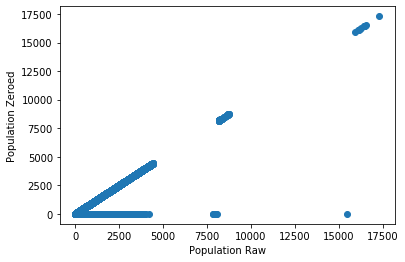

In [13]:
plt.scatter(new.population_raw, new.population_zeroed)
plt.xlabel('Population Raw')
plt.ylabel("Population Zeroed")

In [10]:
np.corrcoef(new.population_raw, new.population_zeroed)

array([[1.        , 0.95530194],
       [0.95530194, 1.        ]])

In [42]:
np.corrcoef(new.population_raw, new.population_linear_interpolated)

array([[ 1., nan],
       [nan, nan]])

In [43]:
new[new.population_raw > new.population_linear_interpolated]

,Unnamed: 0,population_raw,population_zeroed,population_linear_interpolated,date,State-County
11140,2021-03-29,594.0,0.0,588.275862,2021-03-29,AL-Baldwin
11141,2021-03-30,595.0,0.0,589.551724,2021-03-30,AL-Baldwin
11142,2021-03-31,595.0,0.0,590.827586,2021-03-31,AL-Baldwin
11143,2021-04-01,596.0,0.0,592.103448,2021-04-01,AL-Baldwin
11147,2021-04-05,603.0,0.0,597.206897,2021-04-05,AL-Baldwin
11148,2021-04-06,606.0,0.0,598.482759,2021-04-06,AL-Baldwin
11153,2021-04-11,605.0,0.0,604.862069,2021-04-11,AL-Baldwin
11154,2021-04-12,608.0,0.0,606.137931,2021-04-12,AL-Baldwin
11155,2021-04-13,608.0,0.0,607.413793,2021-04-13,AL-Baldwin
11160,2021-04-18,619.0,0.0,613.793103,2021-04-18,AL-Baldwin


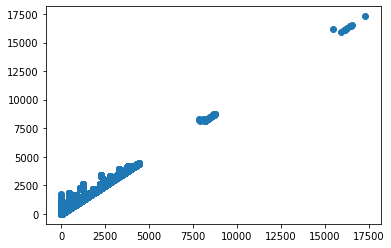

In [41]:
plt.scatter(new.population_raw, new.population_linear_interpolated)